# ML Examinering - Sleep, Health and Lifestyle Analysis
#### 2023

### Jacob Eriksson

##### I denna notebook så använder vi oss av [Sleep, Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download) från Kaggle.

##### Målet är att försöka uppvisa en förståelse för olika Machine Learning tekniker/principer vi gått igenom i klassen. Alltså grundläggande EDA, Data Preprocessing, Feature Engineering, Correlation analysis and Model Engineering(Evaluation, Selection, Tuning etc).

##### Jag har inte spenderat mycket tid på att få fram någon egentligt användbar analys av datasettet, utan fokuset har legat på att visa vissa tekniker för en riktig analys. Med bättre framhåll och bättre kommunikation med Andreas så hade förmodligen kunnat framföra både en bra uppvisning av tekniker samt en ordentlig analys av datasettet. Så för framtida projekt så vill jag vara bättre på att kommunicera med lärare/handledare/chef för att tidigare fånga möjliga problem och förbättringar.

##### Som disclaimer så finns det delar i koden som jag har tagit hjälp av ChatGPT samt Copilot för mer optimerat/förenklat kod. Jag försöker visa i kommentarerna där jag har använt mig mer av dem. Jag försöker förklara koden så gott jag kan i kommentarerna för att visa att i grunden är det jag som skrivit koden, men jag lämnar disclaimer här för att vara öppen ifall du noterar vissa mönster i koden som påminner om GPT/Copilot.

Vi läser in vår dataset i en dataframe.

In [1]:
import pandas as pd
import os

path = os.path.join(os.getcwd(), 'sleep_health_and_lifestyle.csv')
df = pd.read_csv(path)

Vi tar oss en titt på hur datan ser ut. Ifall vi behöver göra någon städning eller förvandling.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [3]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Vi noterar att i Sleep Duration så finns det värden som är större än .6, vilket rimligtvis borde vara 60 minuter. Och vi vet att det är 60 minuter på en timme, så värden som har större än .6 ger oss en bild av att någon har sovit exempelvis 5 timmar och 90 minuter, vilket istället skulle kunnat skrivits som 6 timmar och 30 minuter.

I Datasetet har de förmodligen tänkt sig att decimalerna är 60/10 vilket betyder att varje decimal är 6 minuter. Detta känns dock krångligt att läsa, så vi omvandlar alla värden som är större än .6 till att bli timme och resterande minuter.

Disclaimer: Jag fick hjälp av ChatGPT för att förbättra och optimera omvandlingen nedan.
Mitt försök såg ut såhär:

```python
sleep_duration = []

for i in df['Sleep Duration']:
    hours = int(i)
    minutes = (i - hours) * 100
    if minutes >= 60:
        minutes -= 60
        hours += 1
    updated_duration = hours + minutes / 100
    sleep_duration.append(updated_duration)

df_test['Sleep Duration'] = sleep_duration
```
Min tanke var att om jag hade hours som heltalet i sleep duration och minutes som det iterade värdet - hours * 100 (alltså minus heltalet för att få decimalerna och * 100 så att exempelvis .6 blir 60) så kunde jag titta efter om minutes var större än 60 minuter vilket är cutoffen. Därefter uppdatera minuter till att vara minuterna -= 60 (så om det är 5.9 så  blir utträkningen 90 - 60 = 30) och sedan uppdatera hours till att vara hours + 1 (då vi vet att vi har gått över cutoffen på .6). Sedan blir updated duration timmarna + minuter / 100 (5.9 blir då 6 + 30 / 100 (.3) till slutresultatet av 6.3) som vi sedan appendar i vår tomma lista. Denna lista blir vår nya Sleep Duration.

ChatGPT poängterar att det är simplare att istället att direkt titta om minuter är större än .6 (istället för att multiplicera decimalerna med 100 och sedan omvandla dem tillbaka). ChatGPT erbjöd även tips om att förtydliga koden med bättre variabelnamn samt ett else block för att tydligare visa skillnaden vad som sker ifall minuterna är större än .6 eller inte.

In [5]:
updated_sleep_duration = []

for sleep_duration in df['Sleep Duration']:
    hours = int(sleep_duration)
    minutes = sleep_duration - hours
    
    if minutes > 0.6:
        minutes_adjusted = minutes - 0.6
        hours_adjusted = hours + 1
        updated_duration = hours_adjusted + minutes_adjusted
    else:
        updated_duration = sleep_duration
    
    updated_sleep_duration.append(updated_duration)

df['Sleep Duration'] = updated_sleep_duration
df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,6.3,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,6.3,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Utifrån vad vi kan se så finns det inga null värden, men Personal ID verkar onödig, vi kan använda oss av index istället.

Vi droppar Personal ID och tar en titt en till titt på datan.

In [6]:
df.drop(['Person ID'] , axis=1 , inplace=True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,6.3,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,6.3,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Med den biten avklarade vi kan börja titta närmare på datan och göra vår analys.

Vi kan börja att titta hur många av personerna i datasetet har någon form av sömnproblem.

Vi byter även ut nan värdena till None, mest för läsbarhetens skull.

In [7]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df['Sleep Disorder'].value_counts(dropna=False)

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Vi omvandlar "Blood Pressure" till övre('systolic') och undre('diastolic') tryck. Detta då vi vill normalisera datan när vi ska ta reda på bästa classifier. Som kolumnen var så räknades "Blood Pressure" som en sträng, vilket inte kommer fungera när vi ska normalisera. så vi splittar upp den i två kolumner.

In [8]:
systolic, diastolic = [], []
for val in df['Blood Pressure']:
    val = str(val)
    val = val.split('/')
    systolic.append(int(val[0]))
    diastolic.append(int(val[1]))

df = df.drop(['Blood Pressure'] , axis=1)
df.insert(7 , 'Systolic' , systolic)
df.insert(8 , 'Diastolic' , diastolic)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic,Diastolic,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,126,83,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,125,80,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,125,80,Normal,75,10000,None
3,Male,28,Sales Representative,6.3,4,30,8,140,90,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,6.3,4,30,8,140,90,Obese,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,140,95,Overweight,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,140,95,Overweight,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,140,95,Overweight,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,140,95,Overweight,68,7000,Sleep Apnea


Vi plockar alla våra "numeriska" kolumner samt gör en kopia av vår dataframe.

In [9]:
df_copy = df.copy()
numerical_columns = df_copy.select_dtypes(exclude=['object']).columns
numerical_columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Systolic', 'Diastolic', 'Heart Rate', 'Daily Steps'],
      dtype='object')

Alla våra "kategoriska" kolumner.

In [10]:
categorical_columns = list(set(df_copy.select_dtypes(include=['object']).columns))
categorical_columns

['Occupation', 'Sleep Disorder', 'BMI Category', 'Gender']

Vi ställer upp våra numeriska kolumner i en histplot för att ta oss en titt på distributionen, vi kanske hittar något intressant.

En kort förklaring för koden:

vi skapar en 3x3 subplot och flattenar axs för att lättare iterare över den (i), vi slipper då nestlade indexering i vår for-loop.
Det gör också att vi iterar över alla subplots linjärt och undviker att iterera över varje rad i varje subplot.
Sedan använder vi en for-loop so itererar över våra numeriska kolumner och plottar en histogram för varje kolumn.

Parametern bins är antalet staplar i varje histogram, ax=axs[i] säger vilken subplot vi ska plotta i.
Vi sätter y labeln till att vara en tom sträng, vi behöver inte en label för vi vet att vi ställer upp antalet i varje subplot.
x labeln sätter vi till kolumnens namn.

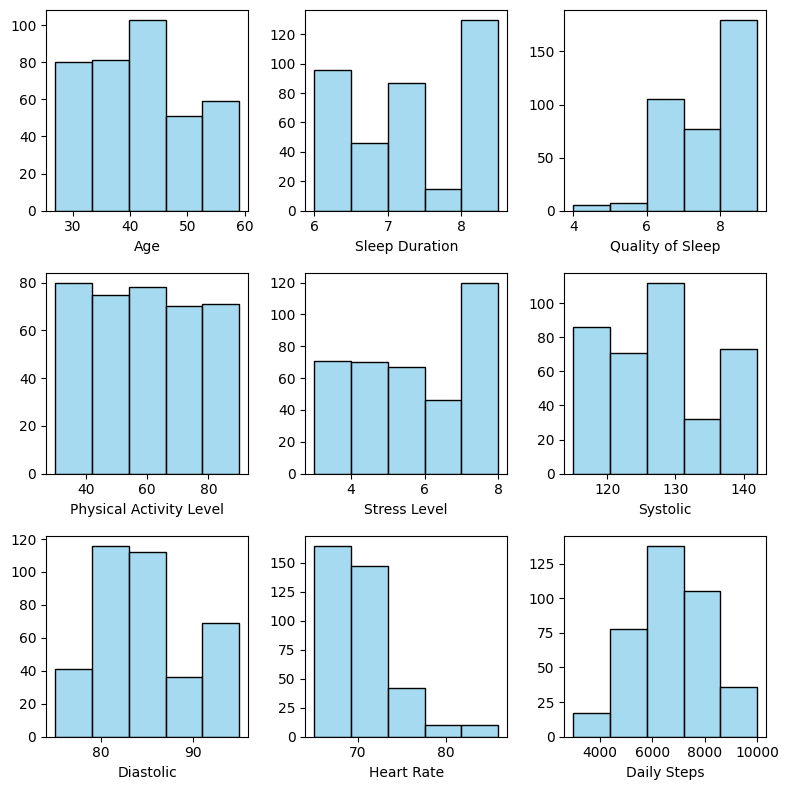

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 3, figsize=(8, 8))
axs = axs.flatten()

for i, n in enumerate(numerical_columns):
        sns.histplot(df[n], bins=5, color='skyblue', ax=axs[i])
        axs[i].set_ylabel("")
        axs[i].set_xlabel(n)

plt.tight_layout()
plt.show()

Zip låter oss itererar över både axs och categorical_columns samtidigt.
Precis som med de numeriska kolumnerna så gör axs.flatten() att vi slipper nestlade indexering.

Disclaimer: Copilot gav mig förslaget att använda zip för att iterera över både axs och categorical_columns samtidigt. Jag använde först enumerate vilket ledde till fick iterera över dem separat och sedan använda [i] för att få indexeringen rätt. Detta är enklare och mer lättläst.

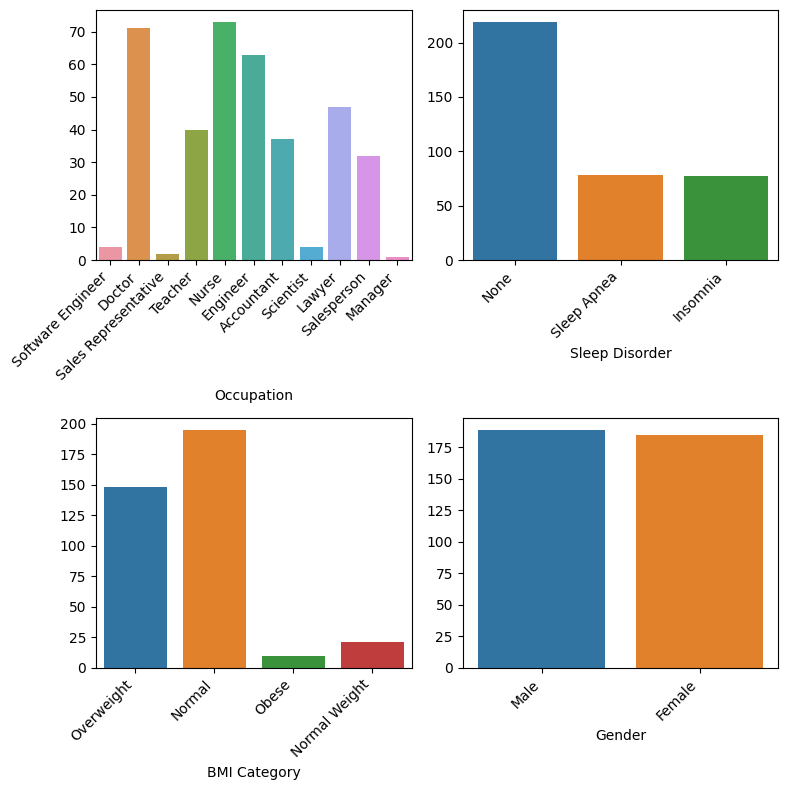

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for ax, n in zip(axs.flat, categorical_columns):
    sns.countplot(x=n, data=df_copy, ax=ax)
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Slutsatser från histogrammen.

* Normal weight och Normal borde vara samma sak, så vi kan slå ihop dem.

* Vi kan också slå ihop overweight och obese, då det inte finns så mycket data på obese människor, och de är väldigt lika.

* Vissa av jobben har väldigt lite data, så vi kan slå ihop dem till en kategori som heter "other".
Vi skapar en ny kolumn att ha dem i.

Vi hittar BMI Category kolumnen och slår ihop Normal Weight och Normal, samt Overweight och Obese.

In [13]:
df_new_copy = df_copy.copy()

df_new_copy.loc[df_new_copy["BMI Category"] == "Normal Weight", "BMI Category"] = "Normal"
df_new_copy.loc[df_new_copy["BMI Category"] == "Obese", "BMI Category"] = "Overweight"
df_new_copy['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    158
Name: count, dtype: int64

Vi skapar en stop_count = 20, vilket är det minsta antalet innan vi slår ihop dem till "other".
vår to_replace är antalet av jobb som är mindre än stop_count vilket vilket byts ut till "other".

In [14]:
stop_count = 20
new_label = "Other"

job_count = df_new_copy['Occupation'].value_counts()
to_replace = job_count[job_count < stop_count].index

df_new_copy['Occupation'] = df_new_copy['Occupation'].replace(to_replace, new_label)
job_count

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Vi visar upp vår nya städade data.

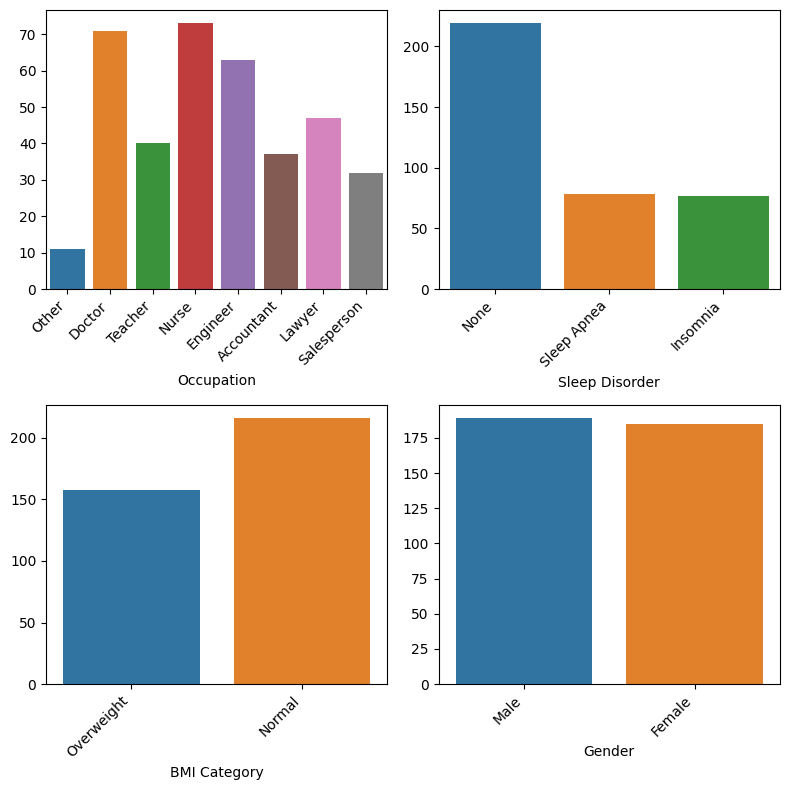

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for ax, n in zip(axs.flat, categorical_columns):
    sns.countplot(x=n, data=df_new_copy, ax=ax)
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Vi kan göra en heatmap som tydligare hittar några möjliga korrelationer mellan kolumnerna.

<Axes: >

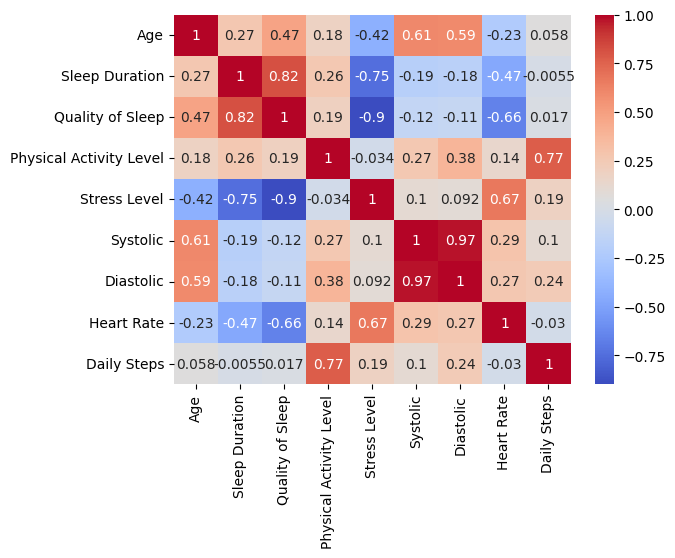

In [28]:
sns.heatmap(df_new_copy.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Slutsatser från heatmapen.

* Det finns flera starka korrelationer, såsom mellan "Sleep Duration" och "Quality of Sleep". Detta är en stark positiv korrelation. (Bättre sömnkvalitet, längre sömn).

* Det är också en stark korrelation mellan "Quality of Sleep" och "Stress Level". I detta fall, en stark negativ korrelation.
(Mer stress, sämre sömnkvalitet).

* Likaså är det en stark korrelation mellan "Sleep Duration" och "Stress Level". (Mer stress, kortare sömn).

Vi kan göra en scatterplot för att jämföra "Sleep Duration" till de andra kolumnerna för att se om vi kan hitta några mönster.

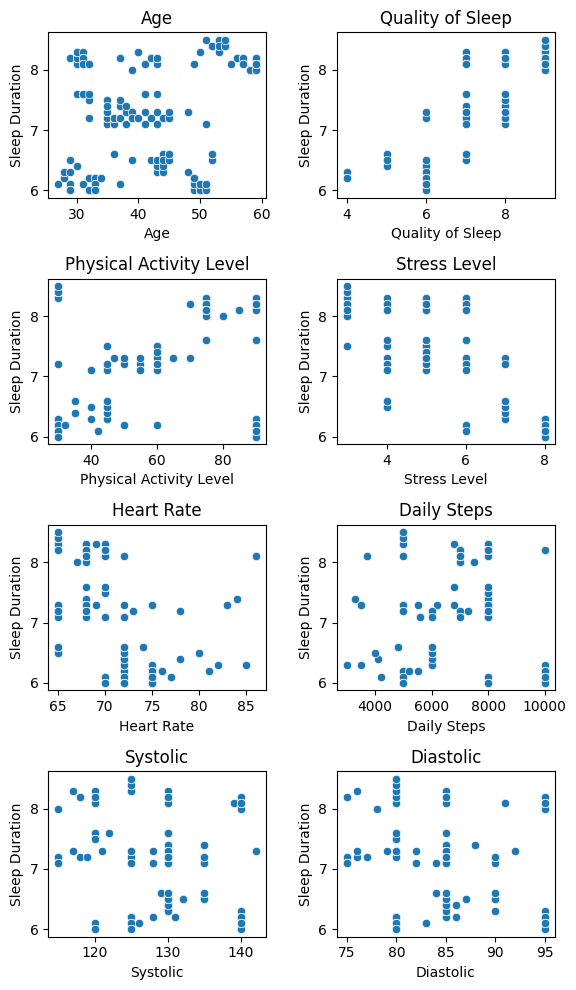

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(6, 10))

numeric_x = ["Age", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]

for ax, n in zip(axs.flat, numeric_x):
    sns.scatterplot(x=n, y='Sleep Duration', data=df_new_copy, ax=ax).set_title(n)

plt.tight_layout()
plt.show()

### Slutsatser från scatterplot.

* Vi ser att det finns en viss linjär trend mellan flera kolumner och "Sleep Duration".
Men det är inte är inte tillräckligt att göra någon säker slutsats.

Vi gör en boxplot mellan "Sleep Disorder" och de andra kolumnerna för att se om vi kan hitta några mönster.

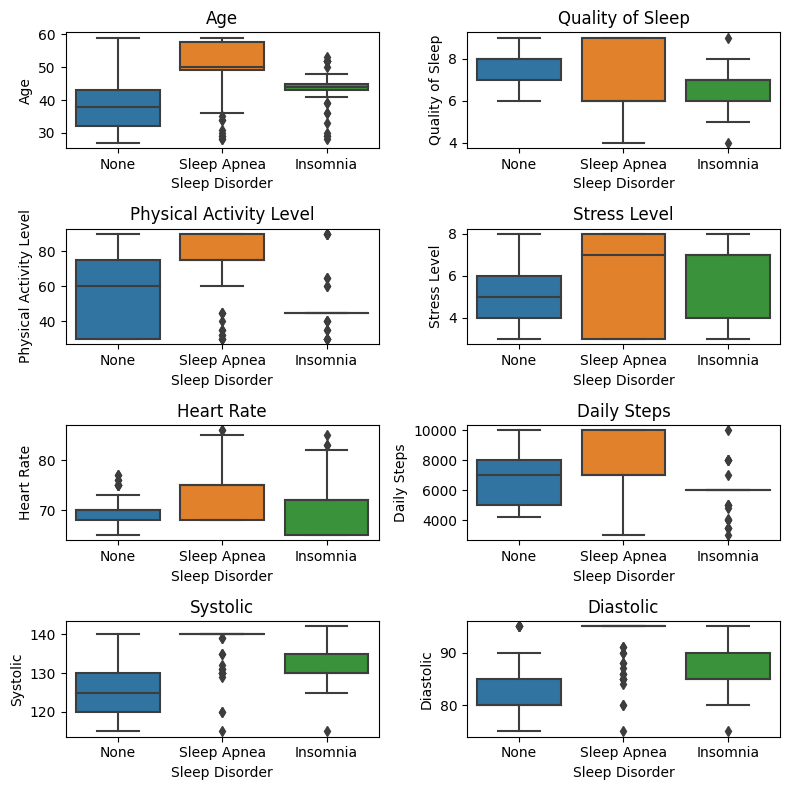

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(8, 8))

for ax, n in zip(axs.flat, numeric_x):
    sns.boxplot(x='Sleep Disorder', y=n, data=df_new_copy, ax=ax).set_title(n)

plt.tight_layout()
plt.show()

### Slutsatser från boxploten.

* Det verkar finnas mer skillnad mellan "Sleep Apnea" och "None" än mellan "Insomnia" och "None".

Note to self: Läs på mer om boxplots för att bättre förstå och hitta mönster i dem.

Låt oss ta mellanvärdet av "Sleep Duration" och jämföra det med våra andra kolumner.

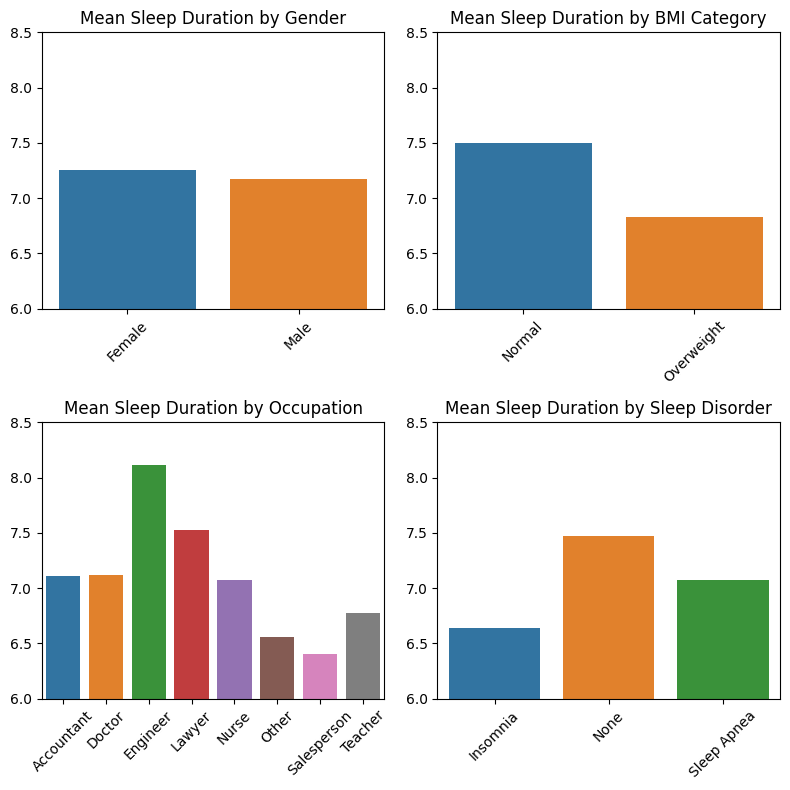

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for ax, n in zip(axs.flat, categorical_columns):
    mean_sleep_duration = df_new_copy.groupby(n)['Sleep Duration'].mean()
    sns.barplot(x=mean_sleep_duration.index, y=mean_sleep_duration.values, ax=ax).set_title('Mean Sleep Duration by ' + n)
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    ax.set_ylim(6, 8.5)

plt.tight_layout()
plt.show()


### Slutsatser från Mean Sleep Duration barplot.

* Det verkar finnas ett samband mellan vikt och mängden sömn. Med normalviktiga som generellt sover mer än överviktiga. Dock endast med runt 30 minuter.

* Ingenjörer verkar sova genomsnittligt 1 timme mer än de andra yrkena i datasetet.

* Mellan könen verkar det dock inte finnas någon märkbar skillnad i sömn.

* Människor med insomnia sover mindre än de med sömnapné och de utan sömnproblem.
* Människor utan sömnproblem sover generellt 1 timme mer än de med insomnia.
* Människor med sömnapné sover 30 minuter mer än de som har insomnia.

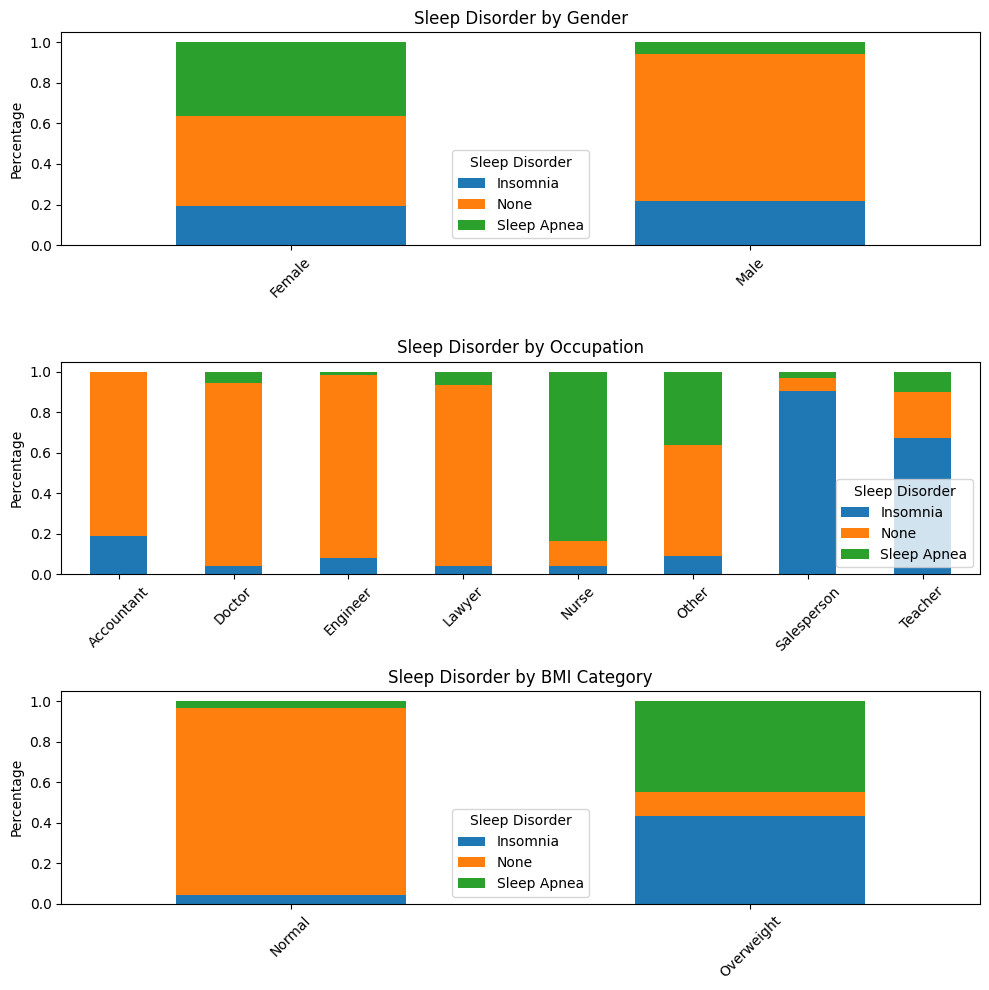

In [ ]:
figs, axs = plt.subplots(3, 1, figsize=(10, 10))

categorical_x = ['Gender', 'Occupation', 'BMI Category']

for i, n in enumerate(categorical_x):
    counts = df_new_copy.groupby(n)['Sleep Disorder'].value_counts(normalize=True).unstack()
    counts.plot(kind='bar', stacked='True', ax=axs[i])
    axs[i].set_ylabel("Percentage")
    axs[i].set_xlabel("")
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_title('Sleep Disorder by ' + n)
    
plt.tight_layout()
plt.show()

### Slutsatser från stacked bar plot.

* Det verkar som att sömnapné är mer vanligt hos kvinnor än hos män i detta dataset.

* Det verkar som att de flesta sjuksköterskor har sömnapné och att de flesta försäljare samt många lärare har insomnia.

* Det verkar även som att de flesta med sömnproblem är överviktiga.

Normaliserar med MinMaxScaler från sklearn.
Vi ska göra ett försök att hitta den bästa classifiern för att förutsäga om en person har sömnproblem eller inte.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((0.1,1.1))
df_normalize = df_copy.copy()

df_normalize[numerical_columns] = scaler.fit_transform(df_normalize[numerical_columns])
df_normalize

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic,Diastolic,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,0.10000,Software Engineer,0.14,0.5,0.30,0.7,0.507407,0.50,Overweight,0.671429,0.271429,None
1,Male,0.13125,Doctor,0.18,0.5,0.60,1.1,0.470370,0.35,Normal,0.576190,1.100000,None
2,Male,0.13125,Doctor,0.18,0.5,0.60,1.1,0.470370,0.35,Normal,0.576190,1.100000,None
3,Male,0.13125,Sales Representative,0.22,0.1,0.10,1.1,1.025926,0.85,Obese,1.052381,0.100000,Sleep Apnea
4,Male,0.13125,Sales Representative,0.22,0.1,0.10,1.1,1.025926,0.85,Obese,1.052381,0.100000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,1.10000,Nurse,0.94,1.1,0.85,0.1,1.025926,1.10,Overweight,0.242857,0.671429,Sleep Apnea
370,Female,1.10000,Nurse,0.90,1.1,0.85,0.1,1.025926,1.10,Overweight,0.242857,0.671429,Sleep Apnea
371,Female,1.10000,Nurse,0.94,1.1,0.85,0.1,1.025926,1.10,Overweight,0.242857,0.671429,Sleep Apnea
372,Female,1.10000,Nurse,0.94,1.1,0.85,0.1,1.025926,1.10,Overweight,0.242857,0.671429,Sleep Apnea


[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) för att omvandla våra kategoriska kolumner (förutom Sleep Disorder) till numeriska.

Sedan lägger vi tillbaka våra kategoriska kolumner i vår normaliserade dataframe fast fit_transformade.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns_sd = list(set(df_copy.select_dtypes(include=['object']).columns) - set(['Sleep Disorder']))
categorical_columns_sd

le = LabelEncoder()
for col in categorical_columns_sd:
    df_normalize[col] = le.fit_transform(df_normalize[col])
df_normalize

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic,Diastolic,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,0.10000,9,0.14,0.5,0.30,0.7,0.507407,0.50,3,0.671429,0.271429,None
1,1,0.13125,1,0.18,0.5,0.60,1.1,0.470370,0.35,0,0.576190,1.100000,None
2,1,0.13125,1,0.18,0.5,0.60,1.1,0.470370,0.35,0,0.576190,1.100000,None
3,1,0.13125,6,0.22,0.1,0.10,1.1,1.025926,0.85,2,1.052381,0.100000,Sleep Apnea
4,1,0.13125,6,0.22,0.1,0.10,1.1,1.025926,0.85,2,1.052381,0.100000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.10000,5,0.94,1.1,0.85,0.1,1.025926,1.10,3,0.242857,0.671429,Sleep Apnea
370,0,1.10000,5,0.90,1.1,0.85,0.1,1.025926,1.10,3,0.242857,0.671429,Sleep Apnea
371,0,1.10000,5,0.94,1.1,0.85,0.1,1.025926,1.10,3,0.242857,0.671429,Sleep Apnea
372,0,1.10000,5,0.94,1.1,0.85,0.1,1.025926,1.10,3,0.242857,0.671429,Sleep Apnea


Vi skapar ett test och train set med 20/80 split.

Sedan använder vi oss av [lazypredict](https://lazypredict.readthedocs.io/en/latest/) för att testa 30 olika classifierns och se vilken som är bäst.

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

X = df_normalize.drop(['Sleep Disorder'] , axis=1)
y = df_normalize['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=y)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 20.07it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.92,0.91,None,0.92,0.02
LGBMClassifier,0.93,0.91,None,0.93,0.10
DecisionTreeClassifier,0.93,0.91,None,0.93,0.02
ExtraTreesClassifier,0.93,0.91,None,0.93,0.20
RandomForestClassifier,0.93,0.91,None,0.93,0.25
LabelPropagation,0.92,0.90,None,0.92,0.02
LabelSpreading,0.92,0.90,None,0.92,0.03
BernoulliNB,0.91,0.89,None,0.91,0.02
QuadraticDiscriminantAnalysis,0.92,0.89,None,0.92,0.02


Vi printar ut den bästa classifiern utifrån vår data och random_state.

I detta fall: GaussianNB med en accuracy på 92.0 och en f1-score på ~ 92.07
Ett klart godkänt betyg.

Om jag hade tid så skulle jag ha velat testa ifall det resultatet faktiskt stämmer, eller om jag missat något.
Samt kanske visat upp det i en confusion matrix.

In [ ]:
Best_Classifier, Best_Accuracy, Best_F1 = models.index[0], models['Accuracy'][0], models['F1 Score'][0]
print(f'Best Classifier: {Best_Classifier}\nBest Accuracy: {Best_Accuracy*100}\nBest F1 Score: {Best_F1*100}')

Best Classifier: GaussianNB
Best Accuracy: 92.0
Best F1 Score: 92.07777777777778
